In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
!pip install catboost

     |████████████████████████████████| 64.8MB 65kB/s 


## view data

In [7]:
train_set = pd.read_csv('/content/drive/My Drive/Academic/Semester 7/CS4622 Machine Learning/Assignments/160411R Fare Classification/train.csv', header=0)

In [8]:
train_set.head(50)

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.000000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.000000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.663800,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
5,189129552,10.5,3407.0,182.0,0.000000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct
6,189132829,10.5,1246.0,487.0,0.000000,133.0,11/1/2019 6:29,11/1/2019 6:49,6.84371,79.9051,6.85069,79.8624,266.62,correct
7,189135103,10.5,1333.0,295.0,17.198500,212.0,11/1/2019 6:50,11/1/2019 7:12,6.90760,79.9524,6.90634,79.9042,318.05,correct
8,189139296,10.5,360.0,80.0,4.664000,3.0,11/1/2019 7:00,11/1/2019 7:06,7.26706,80.6064,7.27422,80.6124,100.32,correct
9,189138671,10.5,1539.0,588.0,33.986400,43.0,11/1/2019 7:02,11/1/2019 7:28,6.85137,79.9537,6.84779,79.9274,257.89,correct


In [9]:
train_set.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


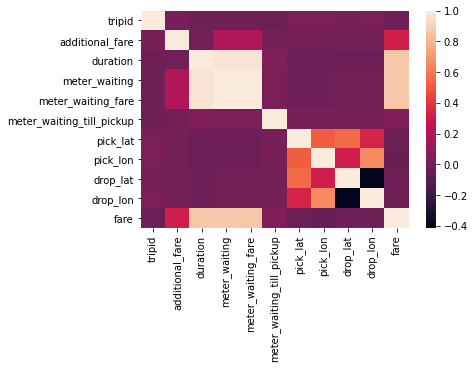

In [10]:
Var_Corr = train_set.corr()

# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

In [11]:
train_set.sort_values('label', ascending=True).head(50)

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
11199,205292639,10.5,2160.0,270.0,15.606000,35.0,12/30/2019 23:30,12/31/2019 0:06,6.90812,79.8992,6.84270,79.9690,609.23,correct
11200,205292609,10.5,598.0,0.0,0.000000,23.0,12/30/2019 23:33,12/30/2019 23:43,6.97214,79.9168,7.00122,79.9501,186.91,correct
11201,205293385,10.5,897.0,6.0,0.000000,21.0,12/30/2019 23:34,12/30/2019 23:49,6.86856,79.8914,6.83266,79.8737,261.15,correct
11202,205295826,5.0,1403.0,371.0,21.629300,0.0,12/30/2019 23:55,12/31/2019 0:18,6.94641,79.9915,6.94865,79.9873,270.22,correct
11203,205299315,5.0,851.0,259.0,15.099700,0.0,12/31/2019 1:09,12/31/2019 1:23,7.00471,79.9539,7.02950,79.9549,214.81,correct
11204,205303008,10.5,440.0,55.0,0.000000,94.0,12/31/2019 4:57,12/31/2019 5:04,6.95486,80.0075,6.97766,79.9977,129.67,correct
11205,205305991,10.5,478.0,111.0,0.000000,359.0,12/31/2019 6:57,12/31/2019 7:05,6.95302,79.9469,6.94340,79.9580,126.45,correct
11206,205306365,10.5,332.0,100.0,5.780000,7.0,12/31/2019 6:57,12/31/2019 7:03,6.84978,79.9004,6.84855,79.8976,93.86,correct
11207,205306300,10.5,396.0,7.0,0.000000,179.0,12/31/2019 7:04,12/31/2019 7:10,6.86256,79.9092,6.87455,79.9214,98.14,correct


## feature engineering

### train set

Read train.csv file

In [12]:
train_set = pd.read_csv('/content/drive/My Drive/Academic/Semester 7/CS4622 Machine Learning/Assignments/160411R Fare Classification/train.csv', index_col='tripid')

Change NaN fields in features

In [13]:
train_set['fare'] = train_set.apply(lambda row:  -1 if np.isnan(row['fare']) else row['fare'], axis=1)
train_set.label.replace(to_replace=dict(correct=1, incorrect=0), inplace=True)

Split features

In [14]:
# train_set['pickup_year'] = train_set.apply(lambda row: int(str(row['pickup_time']).split()[0].split('/')[2]), axis=1)
train_set['pickup_month'] = train_set.apply(lambda row: int(str(row['pickup_time']).split()[0].split('/')[0]), axis=1)
train_set['pickup_day'] = train_set.apply(lambda row: int(str(row['pickup_time']).split()[0].split('/')[1]), axis=1)
train_set['pickup_hour'] = train_set.apply(lambda row: int(str(row['pickup_time']).split()[1].split(':')[0]), axis=1)
train_set['pickup_minute'] = train_set.apply(lambda row: int(str(row['pickup_time']).split()[1].split(':')[1]), axis=1)
# train_set['pickup_time'] = train_set.apply(lambda row: time.mktime(time.strptime(row['pickup_time'], format)), axis=1)

# train_set['drop_year'] = train_set.apply(lambda row: int(str(row['drop_time']).split()[0].split('/')[2]), axis=1)
train_set['drop_month'] = train_set.apply(lambda row: int(str(row['drop_time']).split()[0].split('/')[0]), axis=1)
train_set['drop_day'] = train_set.apply(lambda row: int(str(row['drop_time']).split()[0].split('/')[1]), axis=1)
train_set['drop_hour'] = train_set.apply(lambda row: int(str(row['drop_time']).split()[1].split(':')[0]), axis=1)
train_set['drop_minute'] = train_set.apply(lambda row: int(str(row['drop_time']).split()[1].split(':')[1]), axis=1)
# train_set['drop_time'] = train_set.apply(lambda row: time.mktime(time.strptime(row['drop_time'], format)), axis=1)

Derive new features

In [15]:
format = '%m/%d/%Y %H:%M'

train_set['duration'] = train_set.apply(lambda row: time.mktime(time.strptime(row['drop_time'], format)) - time.mktime(time.strptime(row['pickup_time'], format)) + row['meter_waiting'] + row['meter_waiting_till_pickup'] if np.isnan(row['duration']) else row['duration'], axis=1)

train_set.drop(train_set[train_set['pick_lat'] < 5.9].index, inplace=True)
train_set.drop(train_set[train_set['pick_lat'] > 9.8].index, inplace=True)
train_set.drop(train_set[train_set['pick_lon'] < 79.7].index, inplace=True)
train_set.drop(train_set[train_set['pick_lon'] > 81.8].index, inplace=True)
train_set.drop(train_set[train_set['drop_lat'] < 5.9].index, inplace=True)
train_set.drop(train_set[train_set['drop_lat'] > 9.8].index, inplace=True)
train_set.drop(train_set[train_set['drop_lon'] < 79.7].index, inplace=True)
train_set.drop(train_set[train_set['drop_lon'] > 81.8].index, inplace=True)

r = 6371
distance_df = pd.DataFrame(columns=['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'diff_lat', 'diff_lon', 'a', 'c', 'distance'])
distance_df['pick_lat'] = train_set['pick_lat'] * np.pi / 180
distance_df['pick_lon'] = train_set['pick_lon'] * np.pi / 180
distance_df['drop_lat'] = train_set['drop_lat'] * np.pi / 180
distance_df['drop_lon'] = train_set['drop_lon'] * np.pi / 180
distance_df['diff_lat'] = distance_df['drop_lat'] - distance_df['pick_lat']
distance_df['diff_lon'] = distance_df['drop_lon'] - distance_df['pick_lon']
distance_df['a'] = np.sin(distance_df['diff_lat'] / 2) * np.sin(distance_df['diff_lat'] / 2) + np.cos(distance_df['pick_lat']) * np.cos(distance_df['drop_lat']) * np.sin(distance_df['diff_lon'] / 2) * np.sin(distance_df['diff_lon'] / 2)
distance_df['c'] = 2 * np.arctan2(np.sqrt(distance_df['a']), np.sqrt(1 - distance_df['a']))
distance_df['distance'] = r * distance_df['c']
train_set['distance'] = distance_df['distance']
train_set['distance'] = train_set.apply(lambda row: (row['distance'] - train_set['distance'].mean()) / train_set['distance'].std(), axis=1)

train_set['average_speed'] = train_set.apply(lambda row: -1 if (row['duration'] - row['meter_waiting'] - row['meter_waiting_till_pickup']) <= 0 else row['distance'] / (row['duration'] - row['meter_waiting'] - row['meter_waiting_till_pickup']) * 3600, axis=1)
train_set['unit_riding_fare'] = train_set.apply(lambda row: -1 if row['distance'] <= 0 else (row['fare'] - row['meter_waiting_fare']) / row['distance'], axis=1)
train_set['unit_waiting_fare'] = train_set.apply(lambda row: 0 if row['meter_waiting'] == 0 else (row['meter_waiting_fare']) / row['meter_waiting'] * 60, axis=1)

train_set = train_set.drop(['pickup_time', 'drop_time'], axis=1)
train_set = train_set.drop_duplicates()

In [16]:
for col in train_set.columns: 
  print('%s: %s' % (col, train_set[col].isnull().values.any()))

additional_fare: True
duration: True
meter_waiting: True
meter_waiting_fare: True
meter_waiting_till_pickup: True
pick_lat: False
pick_lon: False
drop_lat: False
drop_lon: False
fare: False
label: False
pickup_month: False
pickup_day: False
pickup_hour: False
pickup_minute: False
drop_month: False
drop_day: False
drop_hour: False
drop_minute: False
distance: False
average_speed: True
unit_riding_fare: True
unit_waiting_fare: True


### test set

Read test.csv file

In [17]:
test_set = pd.read_csv('/content/drive/My Drive/Academic/Semester 7/CS4622 Machine Learning/Assignments/160411R Fare Classification/test.csv', index_col='tripid')

Change NaN fields in features

In [18]:
test_set['fare'] = test_set.apply(lambda row:  -1 if np.isnan(row['fare']) else row['fare'], axis=1)

Split features

In [19]:
# test_set['pickup_year'] = test_set.apply(lambda row: int(str(row['pickup_time']).split()[0].split('/')[2]), axis=1)
test_set['pickup_month'] = test_set.apply(lambda row: int(str(row['pickup_time']).split()[0].split('/')[0]), axis=1)
test_set['pickup_day'] = test_set.apply(lambda row: int(str(row['pickup_time']).split()[0].split('/')[1]), axis=1)
test_set['pickup_hour'] = test_set.apply(lambda row: int(str(row['pickup_time']).split()[1].split(':')[0]), axis=1)
test_set['pickup_minute'] = test_set.apply(lambda row: int(str(row['pickup_time']).split()[1].split(':')[1]), axis=1)
# test_set['pickup_time'] = test_set.apply(lambda row: time.mktime(time.strptime(row['pickup_time'], format)), axis=1)

# test_set['drop_year'] = test_set.apply(lambda row: int(str(row['drop_time']).split()[0].split('/')[2]), axis=1)
test_set['drop_month'] = test_set.apply(lambda row: int(str(row['drop_time']).split()[0].split('/')[0]), axis=1)
test_set['drop_day'] = test_set.apply(lambda row: int(str(row['drop_time']).split()[0].split('/')[1]), axis=1)
test_set['drop_hour'] = test_set.apply(lambda row: int(str(row['drop_time']).split()[1].split(':')[0]), axis=1)
test_set['drop_minute'] = test_set.apply(lambda row: int(str(row['drop_time']).split()[1].split(':')[1]), axis=1)
# test_set['drop_time'] = test_set.apply(lambda row: time.mktime(time.strptime(row['drop_time'], format)), axis=1)

Derive new features

In [20]:
format = '%m/%d/%Y %H:%M'

test_set['duration'] = test_set.apply(lambda row: time.mktime(time.strptime(row['drop_time'], format)) - time.mktime(time.strptime(row['pickup_time'], format)) + row['meter_waiting'] + row['meter_waiting_till_pickup'] if np.isnan(row['duration']) else row['duration'], axis=1)

test_set.drop(test_set[test_set['pick_lat'] < 5.9].index, inplace=True)
test_set.drop(test_set[test_set['pick_lat'] > 9.8].index, inplace=True)
test_set.drop(test_set[test_set['pick_lon'] < 79.7].index, inplace=True)
test_set.drop(test_set[test_set['pick_lon'] > 81.8].index, inplace=True)
test_set.drop(test_set[test_set['drop_lat'] < 5.9].index, inplace=True)
test_set.drop(test_set[test_set['drop_lat'] > 9.8].index, inplace=True)
test_set.drop(test_set[test_set['drop_lon'] < 79.7].index, inplace=True)
test_set.drop(test_set[test_set['drop_lon'] > 81.8].index, inplace=True)

r = 6371
distance_df = pd.DataFrame(columns=['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'diff_lat', 'diff_lon', 'a', 'c', 'distance'])
distance_df['pick_lat'] = test_set['pick_lat'] * np.pi / 180
distance_df['pick_lon'] = test_set['pick_lon'] * np.pi / 180
distance_df['drop_lat'] = test_set['drop_lat'] * np.pi / 180
distance_df['drop_lon'] = test_set['drop_lon'] * np.pi / 180
distance_df['diff_lat'] = distance_df['drop_lat'] - distance_df['pick_lat']
distance_df['diff_lon'] = distance_df['drop_lon'] - distance_df['pick_lon']
distance_df['a'] = np.sin(distance_df['diff_lat'] / 2) * np.sin(distance_df['diff_lat'] / 2) + np.cos(distance_df['pick_lat']) * np.cos(distance_df['drop_lat']) * np.sin(distance_df['diff_lon'] / 2) * np.sin(distance_df['diff_lon'] / 2)
distance_df['c'] = 2 * np.arctan2(np.sqrt(distance_df['a']), np.sqrt(1 - distance_df['a']))
distance_df['distance'] = r * distance_df['c']
test_set['distance'] = distance_df['distance']
test_set['distance'] = test_set.apply(lambda row: (row['distance'] - test_set['distance'].mean()) / test_set['distance'].std(), axis=1)

test_set['average_speed'] = test_set.apply(lambda row: -1 if (row['duration'] - row['meter_waiting'] - row['meter_waiting_till_pickup']) <= 0 else row['distance'] / (row['duration'] - row['meter_waiting'] - row['meter_waiting_till_pickup']) * 3600, axis=1)
test_set['unit_riding_fare'] = test_set.apply(lambda row: -1 if row['distance'] <= 0 else (row['fare'] - row['meter_waiting_fare']) / row['distance'], axis=1)
test_set['unit_waiting_fare'] = test_set.apply(lambda row: 0 if row['meter_waiting'] == 0 else (row['meter_waiting_fare']) / row['meter_waiting'] * 60, axis=1)

test_set = test_set.drop(['pickup_time', 'drop_time'], axis=1)

## label prediction using catboost classifier

In [21]:
from catboost import CatBoostClassifier, Pool

X = train_set.drop(columns=['label'], axis=1)
Y = train_set['label']

# initialize data
model = CatBoostClassifier(iterations=20000)

# train the model
model.fit(X, Y)

# make the prediction using the resulting model
preds_class = model.predict(test_set)
preds_proba = model.predict_proba(test_set)

Streaming output truncated to the last 5000 lines.
15001:	learn: 0.0782569	total: 3m 49s	remaining: 1m 16s
15002:	learn: 0.0782534	total: 3m 49s	remaining: 1m 16s
15003:	learn: 0.0782510	total: 3m 49s	remaining: 1m 16s
15004:	learn: 0.0782489	total: 3m 49s	remaining: 1m 16s
15005:	learn: 0.0782475	total: 3m 49s	remaining: 1m 16s
15006:	learn: 0.0782449	total: 3m 49s	remaining: 1m 16s
15007:	learn: 0.0782432	total: 3m 49s	remaining: 1m 16s
15008:	learn: 0.0782396	total: 3m 49s	remaining: 1m 16s
15009:	learn: 0.0782366	total: 3m 49s	remaining: 1m 16s
15010:	learn: 0.0782352	total: 3m 49s	remaining: 1m 16s
15011:	learn: 0.0782316	total: 3m 50s	remaining: 1m 16s
15012:	learn: 0.0782298	total: 3m 50s	remaining: 1m 16s
15013:	learn: 0.0782255	total: 3m 50s	remaining: 1m 16s
15014:	learn: 0.0782224	total: 3m 50s	remaining: 1m 16s
15015:	learn: 0.0782194	total: 3m 50s	remaining: 1m 16s
15016:	learn: 0.0782172	total: 3m 50s	remaining: 1m 16s
15017:	learn: 0.0782123	total: 3m 50s	remaining: 1m 1

In [22]:
fileobj = open('/content/drive/My Drive/Academic/Semester 7/CS4622 Machine Learning/Assignments/160411R Fare Classification/my_final.csv', 'w')

fileobj.write('tripid,prediction\n')

count = len(test_set)

for i in range(count):
  trip_id = str(test_set.index[i])
  label = str(preds_class[i])
  fileobj.write(trip_id + ',' + label + '\n')

fileobj.close()

In [24]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 20000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.0022239999379962683,
 'loss_function': 'Logloss',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.800000011920929,
 'task_type': 'CPU',
 'use_best_mo